In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/height_dataset.csv")

In [4]:
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  10000 non-null  object 
 1   height  10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [6]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [7]:
df.columns

Index(['gender', 'height'], dtype='object')

In [8]:
df.shape

(10000, 2)

In [9]:
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
df.groupby("gender")["height"].sum()

gender
Female    318543.868017
Male      345131.729531
Name: height, dtype: float64

In [11]:
height_per_inch = df.groupby("gender")["height"].sum()/len(df)
height_per_inch

gender
Female    31.854387
Male      34.513173
Name: height, dtype: float64

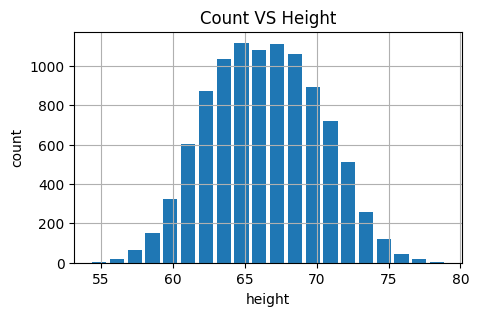

In [12]:
# lets plot a histogram to see the distribution of the data
plt.figure(figsize=(5,3))
plt.hist(df["height"], bins=20, rwidth=0.8)
plt.xlabel("height")
plt.ylabel("count")
plt.title("Count VS Height")
plt.grid()
plt.show()

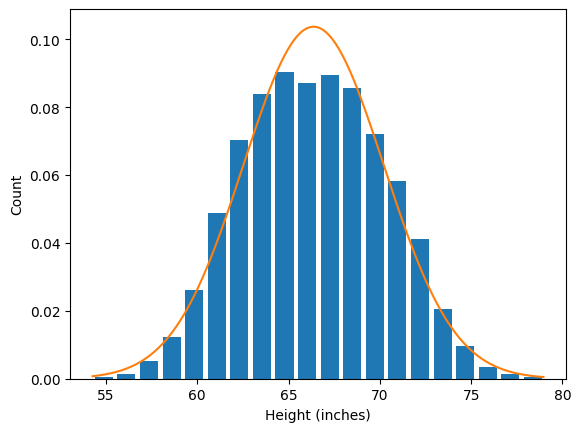

In [13]:
from scipy.stats import norm

plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))
plt.show()

In [14]:
# Now since most of the time all of any data values are within 3 standard deviations, we will use upto 3 STD values and mark rest
# of the others as ouliers

In [17]:
upper_limit = df.height.mean() + 3*df.height.std()

In [18]:
upper_limit

np.float64(77.91014411725271)

In [19]:
# This means that any value which is beyond 77.91 will be considered as an outlier
# now lets make the lower standard deviation limit

lower_limit = df.height.mean() - 3*df.height.std()
lower_limit

np.float64(54.824975392479274)

In [21]:
# Now lets just see how many outliers are there in our dataset

df[(df["height"]>upper_limit) | (df["height"]<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [22]:
# now lets create a dataset which is devoid of outlieres

df2 = df[(df["height"]<upper_limit) & (df["height"]>lower_limit)]
df2

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


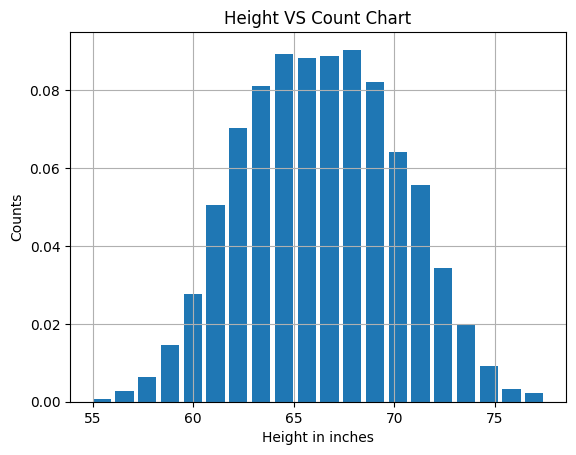

In [28]:
plt.hist(df2.height,bins=20,rwidth=0.8,density=True)
plt.xlabel("Height in inches")
plt.ylabel("Counts")
plt.title("Height VS Count Chart")
plt.grid(True)
plt.show()